<a href="https://colab.research.google.com/github/ganeshgaiy/Media-Bias-Detection/blob/main/bias_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import json
from collections import Counter

In [ ]:
# Define the directory containing your dataset
DATA_DIRECTORY = '/content/drive/MyDrive/Colab Notebooks/NLP CLASS/project/dataset'


In [ ]:
# Mappings for missing fields
MAIN_EVENT_UPDATES = {
    "39_nyt.json": "Democratic filibuster to block Neil Gorsuch's Supreme Court nomination",
    "39_fox.json": "Republicans' nuclear option to confirm Neil Gorsuch amid Democratic opposition",
    "79_hpo.json": "Shooting incident during congressional baseball practice injures Steve Scalise and others",
    "79_fox.json": "Aftermath of congressional baseball practice shooting prompts calls for enhanced lawmaker security",
}

TITLE_UPDATES = {
    "83_nyt.json": "Raul Labrador's Conservative Challenge for House Majority Leadership",
}

In [ ]:
def rename_files_to_lowercase(directory):
    """
    Renames all files in the specified directory to lowercase.
    """
    for filename in os.listdir(directory):
        lowercase_filename = filename.lower()
        os.rename(
            os.path.join(directory, filename),
            os.path.join(directory, lowercase_filename)
        )
    print("All files renamed to lowercase.")

In [ ]:
rename_files_to_lowercase(DATA_DIRECTORY)

All files renamed to lowercase.


In [ ]:
def load_articles(directory):
    """
    Loads articles from JSON files in the specified directory.
    Returns a list of article dictionaries.
    """
    articles = []
    for filename in os.listdir(directory):
        if filename.endswith('.json'):
            filepath = os.path.join(directory, filename)
            try:
                with open(filepath, 'r', encoding='utf-8') as file:
                    article = json.load(file)
                    articles.append(article)
            except json.JSONDecodeError as e:
                print(f"Error decoding JSON from file {filename}: {e}")
    return articles


In [ ]:
articles = load_articles(DATA_DIRECTORY)

In [ ]:
def standardize_source_field(directory):
    """
    Standardizes the 'source' field in all JSON files to lowercase.
    """
    for filename in os.listdir(directory):
        if filename.endswith('.json'):
            filepath = os.path.join(directory, filename)
            try:
                with open(filepath, 'r+', encoding='utf-8') as file:
                    data = json.load(file)
                    if 'source' in data:
                        data['source'] = data['source'].lower()
                        file.seek(0)
                        json.dump(data, file, indent=4)
                        file.truncate()
                        print(f"Standardized 'source' field in {filename}")
            except json.JSONDecodeError as e:
                print(f"Error decoding JSON from file {filename}: {e}")

In [ ]:
standardize_source_field(DATA_DIRECTORY)

Standardized 'source' field in 9_hpo.json
Standardized 'source' field in 8_hpo.json
Standardized 'source' field in 53_nyt.json
Standardized 'source' field in 11_hpo.json
Standardized 'source' field in 56_fox.json
Standardized 'source' field in 7_fox.json
Standardized 'source' field in 58_hpo.json
Standardized 'source' field in 8_nyt.json
Standardized 'source' field in 10_nyt.json
Standardized 'source' field in 67_hpo.json
Standardized 'source' field in 69_fox.json
Standardized 'source' field in 59_hpo.json
Standardized 'source' field in 3_hpo.json
Standardized 'source' field in 25_hpo.json
Standardized 'source' field in 52_hpo.json
Standardized 'source' field in 59_nyt.json
Standardized 'source' field in 9_nyt.json
Standardized 'source' field in 62_fox.json
Standardized 'source' field in 14_fox.json
Standardized 'source' field in 2_nyt.json
Standardized 'source' field in 3_nyt.json
Standardized 'source' field in 10_hpo.json
Standardized 'source' field in 21_fox.json
Standardized 'sourc

In [ ]:
def analyze_source_distribution(articles):
    """
    Analyzes and prints the distribution of articles across different sources.
    """
    sources = [article.get('source', 'Unknown').lower() for article in articles]
    source_distribution = Counter(sources)
    print("\nDistribution across sources:")
    for source, count in source_distribution.items():
        print(f"{source}: {count} articles")

In [ ]:
analyze_source_distribution(articles)


Distribution across sources:
hpo: 100 articles
nyt: 100 articles
fox: 100 articles


In [ ]:
metadata_fields = ['main-entities', 'main-event', 'title', 'url', 'word-count', 'date']

In [ ]:
def check_missing_metadata(articles, metadata_fields):
    """
    Checks and prints the number of articles missing each specified metadata field.
    """
    missing_metadata = {field: 0 for field in metadata_fields}
    for article in articles:
        for field in metadata_fields:
            if not article.get(field):
                missing_metadata[field] += 1
    print("\nMissing metadata fields:")
    for field, count in missing_metadata.items():
        print(f"{field}: {count} articles missing this field")

In [ ]:
check_missing_metadata(articles, metadata_fields)


Missing metadata fields:
main-entities: 0 articles missing this field
main-event: 0 articles missing this field
title: 0 articles missing this field
url: 0 articles missing this field
word-count: 0 articles missing this field
date: 0 articles missing this field


In [ ]:
def list_files_with_missing_fields(directory, fields):
    """
    Lists files missing specified fields.
    """
    missing_files = {field: [] for field in fields}
    for filename in os.listdir(directory):
        if filename.endswith('.json'):
            filepath = os.path.join(directory, filename)
            try:
                with open(filepath, 'r', encoding='utf-8') as file:
                    article = json.load(file)
                    for field in fields:
                        if not article.get(field):
                            missing_files[field].append(filename)
            except json.JSONDecodeError as e:
                print(f"Error decoding JSON from file {filename}: {e}")
    for field, files in missing_files.items():
        print(f"\nFiles missing '{field}':")
        for file in files:
            print(file)

In [ ]:
list_files_with_missing_fields(DATA_DIRECTORY, ['main-event', 'title'])


Files missing 'main-event':

Files missing 'title':


In [ ]:
def update_json_files(directory, main_event_updates, title_updates):
    """
    Updates JSON files with missing 'main-event' and 'title' fields based on provided mappings.
    """
    for filename in os.listdir(directory):
        if filename in main_event_updates or filename in title_updates:
            filepath = os.path.join(directory, filename)
            try:
                with open(filepath, 'r+', encoding='utf-8') as file:
                    data = json.load(file)
                    if filename in main_event_updates:
                        data['main-event'] = main_event_updates[filename]
                    if filename in title_updates:
                        data['title'] = title_updates[filename]
                    file.seek(0)
                    json.dump(data, file, indent=4)
                    file.truncate()
                    print(f"Updated {filename}")
            except json.JSONDecodeError as e:
                print(f"Error decoding JSON from file {filename}: {e}")

In [ ]:
update_json_files(DATA_DIRECTORY, MAIN_EVENT_UPDATES, TITLE_UPDATES)

Updated 83_nyt.json
Updated 79_hpo.json
Updated 39_fox.json
Updated 79_fox.json
Updated 39_nyt.json


In [ ]:
def update_word_count_for_files(directory, filenames):
    """
    Updates the 'word-count' field in specified JSON files based on the number of words in the 'body' field.

    Parameters:
    - directory (str): The path to the directory containing the JSON files.
    - filenames (list): A list of filenames to update.
    """
    for filename in filenames:
        file_path = os.path.join(directory, filename)
        if os.path.exists(file_path):
            try:
                with open(file_path, 'r+', encoding='utf-8') as file:
                    data = json.load(file)
                    if 'body' in data:
                        # Calculate the total word count
                        total_words = sum(
                            len(paragraph.get('sentence', '').split())
                            for paragraph in data['body']
                        )
                        # Update the 'word-count' field
                        data['word-count'] = total_words
                        # Write the updated data back to the file
                        file.seek(0)
                        json.dump(data, file, indent=4)
                        file.truncate()
                        print(f"Updated 'word-count' in {filename}")
                    else:
                        print(f"'body' field missing in {filename}")
            except json.JSONDecodeError as e:
                print(f"Error decoding JSON from file {filename}: {e}")
        else:
            print(f"File {filename} does not exist in the directory.")


In [ ]:
# List of filenames missing 'word-count'
missing_word_count_files = [
    "24_nyt.json", "63_fox.json", "58_nyt.json", "52_nyt.json", "86_fox.json",
    "11_nyt.json", "45_nyt.json", "77_nyt.json", "48_nyt.json", "70_nyt.json",
    "46_fox.json", "60_nyt.json", "26_fox.json", "47_fox.json", "48_fox.json",
    "47_nyt.json", "77_fox.json", "46_nyt.json", "76_fox.json", "24_fox.json",
    "60_fox.json", "26_nyt.json", "52_fox.json", "86_nyt.json", "63_nyt.json",
    "11_fox.json", "58_fox.json", "70_fox.json", "45_fox.json"
]

# Update the 'word-count' field in the specified JSON files
update_word_count_for_files(DATA_DIRECTORY, missing_word_count_files)

Updated 'word-count' in 24_nyt.json
Updated 'word-count' in 63_fox.json
Updated 'word-count' in 58_nyt.json
Updated 'word-count' in 52_nyt.json
Updated 'word-count' in 86_fox.json
Updated 'word-count' in 11_nyt.json
Updated 'word-count' in 45_nyt.json
Updated 'word-count' in 77_nyt.json
Updated 'word-count' in 48_nyt.json
Updated 'word-count' in 70_nyt.json
Updated 'word-count' in 46_fox.json
Updated 'word-count' in 60_nyt.json
Updated 'word-count' in 26_fox.json
Updated 'word-count' in 47_fox.json
Updated 'word-count' in 48_fox.json
Updated 'word-count' in 47_nyt.json
Updated 'word-count' in 77_fox.json
Updated 'word-count' in 46_nyt.json
Updated 'word-count' in 76_fox.json
Updated 'word-count' in 24_fox.json
Updated 'word-count' in 60_fox.json
Updated 'word-count' in 26_nyt.json
Updated 'word-count' in 52_fox.json
Updated 'word-count' in 86_nyt.json
Updated 'word-count' in 63_nyt.json
Updated 'word-count' in 11_fox.json
Updated 'word-count' in 58_fox.json
Updated 'word-count' in 70_f

In [ ]:
list_files_with_missing_fields(DATA_DIRECTORY, ['word-count'])


Files missing 'word-count':


# Analyze Political Stance and Bias Types

Examine the distribution of political stances and bias types within the dataset to identify any class imbalances.

In [ ]:
# Initialize a counter for political stances
stance_counter = Counter()

# Iterate over the articles to count political stances
for article in articles:
    if 'article-level-annotations' in article and 'stance' in article['article-level-annotations']:
        stance = article['article-level-annotations']['stance']
        stance_counter[stance] += 1
    else:
        print(f"Article missing 'stance' field: {article.get('title', 'No Title')}")

# Display the distribution of political stances
print("\nDistribution of Political Stances:")
for stance, count in stance_counter.items():
    print(f"{stance}: {count} articles")



Distribution of Political Stances:
Left: 81 articles
Right: 75 articles
Center: 144 articles


In [ ]:
# List to store filenames of articles with sentence annotations missing 'bias'
files_missing_bias_in_annotations = []

# Iterate over each article to check for missing 'bias' in sentence annotations
for article in articles:
    filename = article.get('filename', 'Unknown Filename')
    body = article.get('body', [])
    for sentence in body:
        annotations = sentence.get('annotations', [])
        for annotation in annotations:
            if 'bias' not in annotation or not annotation['bias']:
                files_missing_bias_in_annotations.append(filename)
                break  # No need to check further annotations in this article
        else:
            continue
        break

# Display the filenames of articles with sentence annotations missing 'bias'
print("\nArticles with Sentence Annotations Missing 'bias':")
for file in files_missing_bias_in_annotations:
    print(file)
# Initialize a counter for bias types
bias_type_counter = Counter()

# Iterate over the articles to count bias types
for article in articles:
    if 'body' in article:
        for sentence in article['body']:
            if 'annotations' in sentence:
                for annotation in sentence['annotations']:
                    bias_type = annotation.get('bias')
                    if bias_type:
                        bias_type_counter[bias_type] += 1
                    else:
                        print(f"Annotation missing 'bias' field in article: {article.get('title', 'No Title')}")
    else:
        print(f"Article missing 'body' field: {article.get('title', 'No Title')}")

# Display the distribution of bias types
print("\nDistribution of Bias Types:")
for bias_type, count in bias_type_counter.items():
    print(f"{bias_type}: {count} instances")



Articles with Sentence Annotations Missing 'bias':

Distribution of Bias Types:
Informational: 1249 instances
Lexical: 478 instances


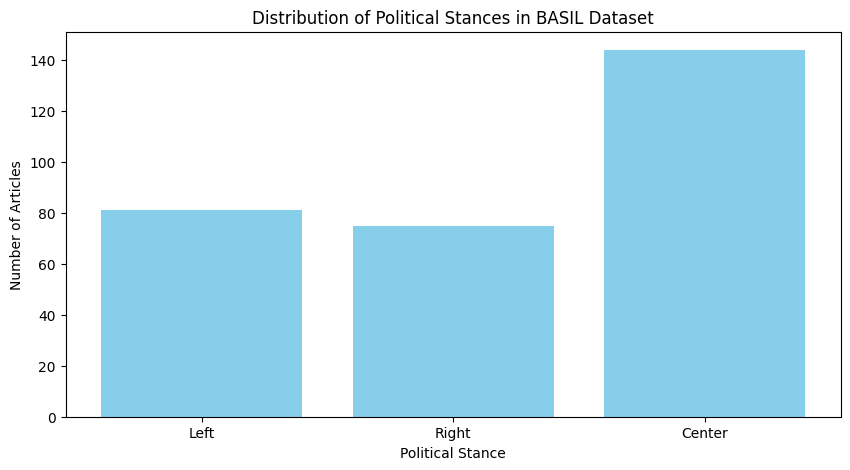

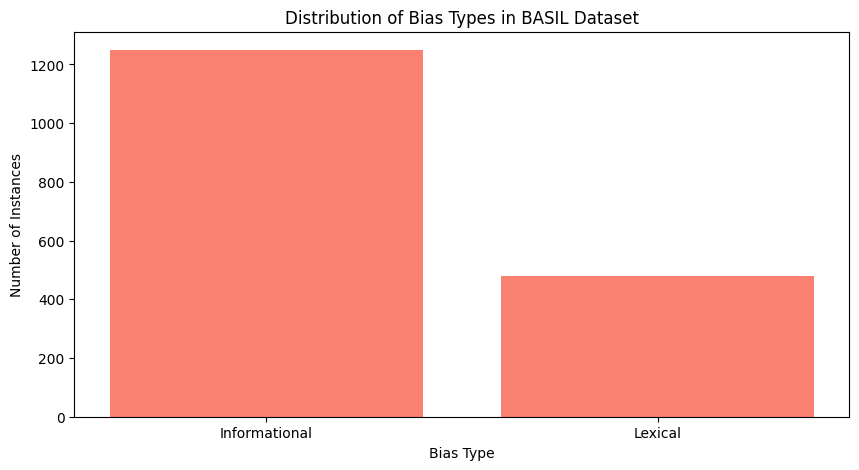

In [ ]:
import matplotlib.pyplot as plt

# Plot distribution of political stances
stances = list(stance_counter.keys())
counts = list(stance_counter.values())

plt.figure(figsize=(10, 5))
plt.bar(stances, counts, color='skyblue')
plt.xlabel('Political Stance')
plt.ylabel('Number of Articles')
plt.title('Distribution of Political Stances in BASIL Dataset')
plt.show()

# Plot distribution of bias types
bias_types = list(bias_type_counter.keys())
bias_counts = list(bias_type_counter.values())

plt.figure(figsize=(10, 5))
plt.bar(bias_types, bias_counts, color='salmon')
plt.xlabel('Bias Type')
plt.ylabel('Number of Instances')
plt.title('Distribution of Bias Types in BASIL Dataset')
plt.show()


In [ ]:
# Initialize counters and lists for analysis
total_sentences = 0
sentences_without_annotations = 0
files_missing_bias_in_annotations = []

# Iterate over each article
for article in articles:
    filename = article.get('filename', 'Unknown Filename')
    body = article.get('body', [])
    for sentence in body:
        total_sentences += 1  # Increment the total sentence count
        annotations = sentence.get('annotations', [])
        if not annotations:
            sentences_without_annotations += 1  # Increment if no annotations exist
        for annotation in annotations:
            if 'bias' not in annotation or not annotation['bias']:
                files_missing_bias_in_annotations.append(filename)
                break  # No need to check further annotations in this article
        else:
            continue
        break

# Display the results
print(f"\nTotal number of sentences: {total_sentences}")
print(f"Number of sentences without annotations: {sentences_without_annotations}")
print(f"Percentage of sentences without annotations: {(sentences_without_annotations / total_sentences) * 100:.2f}%")

# Display the filenames of articles with sentence annotations missing 'bias'
print("\nArticles with Sentence Annotations Missing 'bias':")
for file in set(files_missing_bias_in_annotations):  # Use set to avoid duplicates
    print(file)



Total number of sentences: 7984
Number of sentences without annotations: 6359
Percentage of sentences without annotations: 79.65%

Articles with Sentence Annotations Missing 'bias':


# Text Pre processing

In [ ]:
import re

def normalize_text(text):
    """
    Normalize text by:
    - Converting to lowercase.
    - Removing extra whitespace.
    - Decoding escaped characters.
    - Handling special characters.
    """
    # Convert to lowercase
    text = text.lower()
    # Decode escaped characters like \u2019 to ’
    text = text.encode('utf-8').decode('unicode_escape')
    # Remove special characters except for basic punctuation
    text = re.sub(r'[^a-z0-9\s.,!?\'\"]+', '', text)
    # Normalize whitespace
    text = re.sub(r'\s+', ' ', text).strip()
    return text

def preprocess_body_text(article_body):
    """
    Applies text normalization to all sentences in the 'body' field of an article.
    """
    for sentence in article_body:
        if 'sentence' in sentence:
            sentence['sentence'] = normalize_text(sentence['sentence'])

# Apply the preprocessing to all articles
for article in articles:
    if 'body' in article:
        preprocess_body_text(article['body'])
    else:
        print(f"Article missing 'body' field: {article.get('title', 'No Title')}")

# Display a sample of processed sentences to verify
sample_size = 5
print("\nSample of normalized sentences:")
for article in articles[:sample_size]:
    print(f"Article: {article.get('title', 'No Title')}")
    if 'body' in article:
        for sentence in article['body'][:sample_size]:
            print(f"Normalized Sentence: {sentence.get('sentence', 'No sentence')}")
    else:
        print("No body found in article.")



Sample of normalized sentences:
Article: John McCain, Top Democrats Call On Trump To Cancel Putin Meeting
Normalized Sentence: sen. john mccain rariz., senate minority leader chuck schumer dn.y. and 18 members of the house foreign affairs committee called on president donald trump to cancel his meeting with russian president vladimir putin after indictments were announced friday accusing a dozen kremlin intelligence officers of hacking democratic party emails during the 2016 presidential campaign.
Normalized Sentence: but a senior administration source told nbc on friday that there was zero chance the controversial private meeting between the two men would be canceled.
Normalized Sentence: mccain tweeted that if trump is not prepared to hold putin accountable, the talks in helsinki on monday should not move forward.
Normalized Sentence: he said the indictments are evidence of an extensive plot by putins government to attack the 2016 election, sow chaos and dissension among the america

In [ ]:
def check_annotation_consistency(articles):
    """
    Check for missing or inconsistent fields in sentence annotations.
    """
    # Required fields in annotations
    required_annotation_fields = ['bias', 'polarity', 'target']
    missing_annotations_count = {field: 0 for field in required_annotation_fields}
    inconsistent_values = {'bias': set(), 'polarity': set(), 'target': set()}

    # Iterate through articles
    for article in articles:
        if 'body' in article:
            for sentence in article['body']:
                annotations = sentence.get('annotations', [])
                for annotation in annotations:
                    # Check for missing fields
                    for field in required_annotation_fields:
                        if field not in annotation or not annotation[field]:
                            missing_annotations_count[field] += 1
                        else:
                            # Collect values for consistency check
                            inconsistent_values[field].add(annotation[field])

    # Display results
    print("\nMissing fields in annotations:")
    for field, count in missing_annotations_count.items():
        print(f"{field}: {count} missing")

    print("\nInconsistent values in annotations:")
    for field, values in inconsistent_values.items():
        print(f"{field}: {values}")


def check_metadata_consistency_corrected(articles, metadata_fields):
    """
    Check for missing or inconsistent metadata fields in articles.
    """
    missing_metadata_count = {field: 0 for field in metadata_fields}

    # Iterate through articles
    for article in articles:
        for field in metadata_fields:
            if field == 'stance':
                # Check within 'article-level-annotations'
                if 'article-level-annotations' not in article or field not in article['article-level-annotations']:
                    missing_metadata_count[field] += 1
            else:
                if field not in article or not article[field]:
                    missing_metadata_count[field] += 1

    # Display results
    print("\nMissing metadata fields:")
    for field, count in missing_metadata_count.items():
        print(f"{field}: {count} missing")



# Check for annotation consistency
check_annotation_consistency(articles)

# Check for metadata consistency
metadata_fields = ['source', 'main-event', 'stance']
check_metadata_consistency_corrected(articles, metadata_fields)



Missing fields in annotations:
bias: 0 missing
polarity: 0 missing
target: 0 missing

Inconsistent values in annotations:
bias: {'Lexical', 'Informational'}
polarity: {'Negative', 'Positive'}
target: {'Ted Cruz', 'National Enquirer', 'Benjamin Netanyahu', 'Walmart', 'Vicente Fox', 'Internal Revenue Service', 'NAACP', 'police', 'Michael Bloomberg', 'Ruth Bader Ginsburg', 'Duncan Hunter', 'Democrats presidential candidates', 'Raul Labrador', 'Michael Steele', 'Cesar Sayoc', 'Richard Blumenthal', 'AARP', 'Michael Morell', 'Religious Freedom Restoration Act', 'Victoria Nuland', 'Democratic Lawmakers', 'Democratic lawmakers', 'lawmakers', 'Sasha and Malia Obama', 'social media companies', 'Newsweek', 'Lois Lerner', 'National Rifle Association', 'social security', 'Senate Democrats', 'Duncan and Margaret Hunter', 'internet companies', 'Rashida Tlaib', 'Peter Strzok', 'Susan Rice', 'Chris Christie', 'WikiLeaks', 'Justice Department', 'GOP committee members', 'Nebraska officials', 'State Depa

Missing Fields:
No missing values for bias, polarity, or target, which indicates that all annotations are complete.
Inconsistent Values:
The bias and polarity fields have consistent values (Informational, Lexical for bias, and Positive, Negative for polarity).
The target field contains a wide range of entities, which is expected since it refers to the target of the bias in each sentence. These values appear contextually valid.

# Document level data preparation



In [ ]:
def prepare_document_level_data(articles):
    """
    Prepare data for document-level classification.
    Combines all sentences in an article into a single text and uses the stance as the label.
    """
    doc_data = []
    for article in articles:
        if 'article-level-annotations' in article:
            stance = article['article-level-annotations'].get('stance')
            if stance:
                body_text = " ".join(
                    [sentence['sentence'] for sentence in article.get('body', []) if 'sentence' in sentence]
                )
                doc_data.append({'text': body_text, 'stance': stance})
    return doc_data

# Prepare data
document_level_data = prepare_document_level_data(articles)

# Display sample
print("\nSample Document-Level Data:")
for sample in document_level_data[:3]:
    print(f"Text: {sample['text'][:100]}...")  # Truncated for display
    print(f"Stance: {sample['stance']}")



Sample Document-Level Data:
Text: sen. john mccain rariz., senate minority leader chuck schumer dn.y. and 18 members of the house fore...
Stance: Left
Text: new york u.s. sen. marco rubio rfla. set forth a foreign policy vision wednesday that invoked presid...
Stance: Left
Text: mike huckabee, a former republican governor of arkansas and preacher who has announced his run for t...
Stance: Left


In [ ]:
def prepare_sentence_level_data(articles):
    """
    Prepare data for sentence-level bias detection.
    Each sentence is labeled with its bias type and polarity.
    """
    sentence_data = []
    for article in articles:
        for sentence in article.get('body', []):
            if 'annotations' in sentence and sentence['annotations']:
                for annotation in sentence['annotations']:
                    sentence_data.append({
                        'sentence': sentence['sentence'],
                        'bias': annotation.get('bias', 'No Bias'),
                        'polarity': annotation.get('polarity', 'Neutral')
                    })
            else:
                sentence_data.append({
                    'sentence': sentence['sentence'],
                    'bias': 'No Bias',
                    'polarity': 'Neutral'
                })
    return sentence_data

# Prepare data
sentence_level_data = prepare_sentence_level_data(articles)

# Display sample
print("\nSample Sentence-Level Data:")
for sample in sentence_level_data[:5]:
    print(f"Sentence: {sample['sentence']}")
    print(f"Bias: {sample['bias']}, Polarity: {sample['polarity']}")



Sample Sentence-Level Data:
Sentence: sen. john mccain rariz., senate minority leader chuck schumer dn.y. and 18 members of the house foreign affairs committee called on president donald trump to cancel his meeting with russian president vladimir putin after indictments were announced friday accusing a dozen kremlin intelligence officers of hacking democratic party emails during the 2016 presidential campaign.
Bias: No Bias, Polarity: Neutral
Sentence: but a senior administration source told nbc on friday that there was zero chance the controversial private meeting between the two men would be canceled.
Bias: No Bias, Polarity: Neutral
Sentence: mccain tweeted that if trump is not prepared to hold putin accountable, the talks in helsinki on monday should not move forward.
Bias: No Bias, Polarity: Neutral
Sentence: he said the indictments are evidence of an extensive plot by putins government to attack the 2016 election, sow chaos and dissension among the american electorate, and under

In [ ]:
from sklearn.model_selection import train_test_split

def split_data(data, label_column, test_size=0.2, random_state=42):
    """
    Splits data into training and test sets based on the label column.
    """
    texts = [item['text'] if 'text' in item else item['sentence'] for item in data]
    labels = [item[label_column] for item in data]
    return train_test_split(texts, labels, test_size=test_size, random_state=random_state)

# Split document-level data
doc_train_texts, doc_test_texts, doc_train_labels, doc_test_labels = split_data(document_level_data, 'stance')

# Split sentence-level data
sent_train_texts, sent_test_texts, sent_train_labels, sent_test_labels = split_data(sentence_level_data, 'bias')

# Display data splits
print("\nDocument-Level Data:")
print(f"Training size: {len(doc_train_texts)}, Test size: {len(doc_test_texts)}")
print("\nSentence-Level Data:")
print(f"Training size: {len(sent_train_texts)}, Test size: {len(sent_test_texts)}")



Document-Level Data:
Training size: 240, Test size: 60

Sentence-Level Data:
Training size: 6468, Test size: 1618


In [ ]:
import torch
from transformers import BertTokenizer, BertForSequenceClassification
from torch.utils.data import Dataset, DataLoader
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report


In [ ]:
# Initialize label encoder
label_encoder = LabelEncoder()

# Fit label encoder and transform labels
doc_train_labels_encoded = label_encoder.fit_transform(doc_train_labels)
doc_test_labels_encoded = label_encoder.transform(doc_test_labels)

# Get the number of classes
num_labels = len(label_encoder.classes_)
print(f"Classes: {label_encoder.classes_}")


Classes: ['Center' 'Left' 'Right']


In [ ]:
class ArticleDataset(Dataset):
    def __init__(self, texts, labels, tokenizer, max_len):
        self.texts = texts
        self.labels = labels  # These should already be encoded
        self.tokenizer = tokenizer
        self.max_len = max_len

    def __len__(self):
        return len(self.texts)

    def __getitem__(self, idx):
        text = str(self.texts[idx])
        label = self.labels[idx]

        encoding = self.tokenizer.encode_plus(
            text,
            add_special_tokens=True,
            max_length=self.max_len,
            truncation=True,
            padding='max_length',
            return_attention_mask=True,
            return_tensors='pt',
        )

        return {
            'text': text,
            'input_ids': encoding['input_ids'].flatten(),
            'attention_mask': encoding['attention_mask'].flatten(),
            'labels': torch.tensor(label, dtype=torch.long)
        }


In [ ]:
# Initialize tokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

# Define maximum sequence length
MAX_LEN = 512

# Create datasets
train_dataset = ArticleDataset(doc_train_texts, doc_train_labels_encoded, tokenizer, MAX_LEN)
test_dataset = ArticleDataset(doc_test_texts, doc_test_labels_encoded, tokenizer, MAX_LEN)


In [ ]:
BATCH_SIZE = 8

train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=BATCH_SIZE)


In [ ]:
model = BertForSequenceClassification.from_pretrained(
    'bert-base-uncased',
    num_labels=num_labels,
    output_attentions=False,
    output_hidden_states=False
)

# Move model to GPU if available
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = model.to(device)


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
from transformers import AdamW, get_linear_schedule_with_warmup

EPOCHS = 10
optimizer = AdamW(model.parameters(), lr=2e-5, eps=1e-8)

total_steps = len(train_loader) * EPOCHS

scheduler = get_linear_schedule_with_warmup(
    optimizer,
    num_warmup_steps=0,
    num_training_steps=total_steps
)


/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:591: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


In [ ]:
def train_epoch(model, data_loader, optimizer, scheduler, device):
    model = model.train()
    total_loss = 0

    for batch in data_loader:
        optimizer.zero_grad()

        input_ids = batch['input_ids'].to(device)
        attention_mask = batch['attention_mask'].to(device)
        labels = batch['labels'].to(device)

        outputs = model(
            input_ids=input_ids,
            attention_mask=attention_mask,
            labels=labels
        )

        loss = outputs.loss
        total_loss += loss.item()

        loss.backward()
        torch.nn.utils.clip_grad_norm_(model.parameters(), max_norm=1.0)
        optimizer.step()
        scheduler.step()

    avg_loss = total_loss / len(data_loader)
    return avg_loss

def eval_model(model, data_loader, device):
    model = model.eval()
    total_loss = 0
    predictions = []
    true_labels = []

    with torch.no_grad():
        for batch in data_loader:
            input_ids = batch['input_ids'].to(device)
            attention_mask = batch['attention_mask'].to(device)
            labels = batch['labels'].to(device)

            outputs = model(
                input_ids=input_ids,
                attention_mask=attention_mask,
                labels=labels
            )

            loss = outputs.loss
            logits = outputs.logits

            total_loss += loss.item()
            preds = torch.argmax(logits, dim=1)
            predictions.extend(preds.cpu().numpy())
            true_labels.extend(labels.cpu().numpy())

    avg_loss = total_loss / len(data_loader)
    return avg_loss, predictions, true_labels


Epoch 1/10
----------
Training loss: 1.1130810856819153
Validation loss: 1.0618592649698257
              precision    recall  f1-score   support

      Center       0.45      1.00      0.62        27
        Left       0.00      0.00      0.00        14
       Right       0.00      0.00      0.00        19

    accuracy                           0.45        60
   macro avg       0.15      0.33      0.21        60
weighted avg       0.20      0.45      0.28        60

Epoch 2/10
----------


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Training loss: 1.0404356161753336
Validation loss: 1.0794429779052734
              precision    recall  f1-score   support

      Center       0.45      1.00      0.62        27
        Left       0.00      0.00      0.00        14
       Right       0.00      0.00      0.00        19

    accuracy                           0.45        60
   macro avg       0.15      0.33      0.21        60
weighted avg       0.20      0.45      0.28        60

Epoch 3/10
----------


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Training loss: 1.0043991029262542
Validation loss: 1.091030053794384
              precision    recall  f1-score   support

      Center       0.45      1.00      0.62        27
        Left       0.00      0.00      0.00        14
       Right       0.00      0.00      0.00        19

    accuracy                           0.45        60
   macro avg       0.15      0.33      0.21        60
weighted avg       0.20      0.45      0.28        60

Epoch 4/10
----------


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Training loss: 0.9628209471702576
Validation loss: 1.0783167779445648
              precision    recall  f1-score   support

      Center       0.44      0.93      0.60        27
        Left       1.00      0.07      0.13        14
       Right       0.00      0.00      0.00        19

    accuracy                           0.43        60
   macro avg       0.48      0.33      0.24        60
weighted avg       0.43      0.43      0.30        60

Epoch 5/10
----------
Training loss: 0.7715058634678523
Validation loss: 1.222169190645218
              precision    recall  f1-score   support

      Center       0.33      0.48      0.39        27
        Left       0.17      0.07      0.10        14
       Right       0.27      0.21      0.24        19

    accuracy                           0.30        60
   macro avg       0.26      0.25      0.24        60
weighted avg       0.27      0.30      0.28        60

Epoch 6/10
----------
Training loss: 0.6364878336588542
Validation loss: 1.32

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Training loss: 0.5277624418338139
Validation loss: 1.366205483675003
              precision    recall  f1-score   support

      Center       0.36      0.63      0.46        27
        Left       0.50      0.07      0.12        14
       Right       0.09      0.05      0.07        19

    accuracy                           0.32        60
   macro avg       0.32      0.25      0.22        60
weighted avg       0.31      0.32      0.26        60

Epoch 8/10
----------
Training loss: 0.4206020380059878
Validation loss: 1.419554851949215
              precision    recall  f1-score   support

      Center       0.40      0.70      0.51        27
        Left       0.33      0.07      0.12        14
       Right       0.33      0.16      0.21        19

    accuracy                           0.38        60
   macro avg       0.35      0.31      0.28        60
weighted avg       0.36      0.38      0.32        60

Epoch 9/10
----------
Training loss: 0.33617412149906156
Validation loss: 1.46

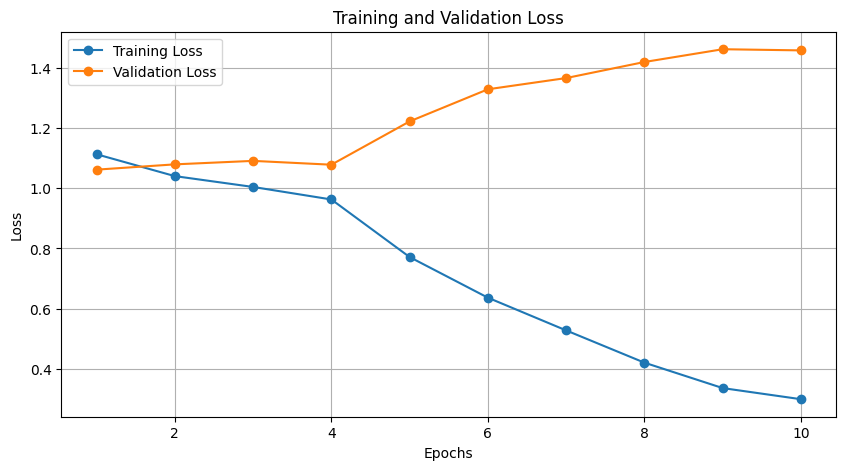

In [ ]:
import matplotlib.pyplot as plt

# Initialize lists to store losses
train_losses = []
val_losses = []

for epoch in range(EPOCHS):
    print(f'Epoch {epoch + 1}/{EPOCHS}')
    print('-' * 10)

    # Train the model and store the loss
    train_loss = train_epoch(model, train_loader, optimizer, scheduler, device)
    train_losses.append(train_loss)
    print(f'Training loss: {train_loss}')

    # Validate the model and store the loss
    val_loss, predictions, true_labels = eval_model(model, test_loader, device)
    val_losses.append(val_loss)
    print(f'Validation loss: {val_loss}')

    # Decode labels back to original classes
    true_labels_decoded = label_encoder.inverse_transform(true_labels)
    predictions_decoded = label_encoder.inverse_transform(predictions)

    # Classification report
    print(classification_report(true_labels_decoded, predictions_decoded))

# Plot Training and Validation Losses
plt.figure(figsize=(10, 5))
plt.plot(range(1, EPOCHS + 1), train_losses, label='Training Loss', marker='o')
plt.plot(range(1, EPOCHS + 1), val_losses, label='Validation Loss', marker='o')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.grid()
plt.show()
